<a href="https://colab.research.google.com/github/drchristhorpe/apo_vs_holo_pmhc_tcr/blob/main/Apo_vs_Holo_peptide_MHC_TCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install py3Dmol

import requests
import matplotlib as plt


In [2]:
def find_complex_for_comparison(comparison:str) -> str:
  matched_complex = None
  for complex in rmsds:
    if comparison in rmsds[complex].keys():
      matched_complex = complex
  return matched_complex



rmsds_url = "https://raw.githubusercontent.com/drchristhorpe/apo_vs_holo_pmhc_tcr/main/data/peptide_rmsds.json"

r = requests.get(rmsds_url)

rmsds = r.json()

rmsds



{'hla_a_24_02_rypltfgw': {'5hgb_vs_8gvi': {'all_atom': {'1': 2.3756,
    '2': 1.4261,
    '3': 0.9102,
    '4': 0.8717,
    '5': 1.2811,
    '6': 0.6293,
    '7': 0.4393,
    '8': 0.8381},
   'backbone': {'1': 0.4772,
    '2': 0.3861,
    '3': 0.6162,
    '4': 0.6202,
    '5': 0.6409,
    '6': 0.684,
    '7': 0.4393,
    '8': 0.7969},
   'sidechain': {'1': 2.956,
    '2': 1.7251,
    '3': 1.1946,
    '4': 1.0653,
    '5': 1.8116,
    '6': 0.5958,
    '7': None,
    '8': 0.8526}},
  '4wu5_vs_8gvi': {'all_atom': {'1': 2.5516,
    '2': 1.4904,
    '3': 0.8652,
    '4': 0.8822,
    '5': 1.3585,
    '6': 0.5419,
    '7': 0.4546,
    '8': 1.0703},
   'backbone': {'1': 0.4175,
    '2': 0.4683,
    '3': 0.5314,
    '4': 0.616,
    '5': 0.6864,
    '6': 0.692,
    '7': 0.4546,
    '8': 0.8217},
   'sidechain': {'1': 3.183,
    '2': 1.7951,
    '3': 1.1704,
    '4': 1.0849,
    '5': 1.9178,
    '6': 0.4334,
    '7': None,
    '8': 1.1474}},
  '5hgb_vs_8gvb': {'all_atom': {'1': 2.4425,
    '2': 1

In [3]:
backbone_rmsd_groups = [0.5, 1.0, 2, 4]
labels = ['little_movement', 'some_movement', 'movement', 'large_movement', 'significant_movement']

selections = ['all_atom', 'backbone']

clusters = {}

for selection in selections:
  clusters[selection] = {}
  for label in labels:
    clusters[selection][label] = []


def categorize_movement(rmsd):
  i = 0
  category = 0
  if rmsd:
    for backbone_rmsd in backbone_rmsd_groups:
      if rmsd > backbone_rmsd:
        category = i + 1
      i+= 1
    return category
  else:
    return None



max_movement = 0
max_comparison = None

for complex_slug in rmsds:
  for comparison in rmsds[complex_slug]:
    comparison_peptide_rmsds = rmsds[complex_slug][comparison]

    for selection in selections:
      max_category = 0
      max_rmsd = 0
      for residue in comparison_peptide_rmsds[selection]:
        position_rmsd = comparison_peptide_rmsds[selection][residue]
        residue_category = categorize_movement(position_rmsd)
        if residue_category:
          if residue_category > max_category:
            max_category = residue_category
        if position_rmsd:
          if position_rmsd > max_rmsd:
            max_rmsd = position_rmsd
      clusters[selection][labels[max_category]].append({'complex':complex_slug, 'comparison':comparison, 'max_rmsd':max_rmsd, 'rmsds':comparison_peptide_rmsds[selection]})

      if max_rmsd > max_movement:
        max_movement = max_rmsd
        max_comparison = {'complex':complex_slug, 'comparison':comparison, 'selection':selection, 'rmsds':comparison_peptide_rmsds[selection]}

print (max_comparison['complex'])
print (max_comparison['comparison'])
print (max_comparison['selection'])
print (max_comparison['rmsds'])
print (max_movement)











hla_b_35_01_hpvgqadyfey
4pra_vs_4prp
all_atom
{'1': 0.2829, '2': 0.147, '3': 0.3938, '4': 0.9851, '5': 7.3121, '6': 4.9416, '7': 10.624, '8': 10.3497, '9': 2.4726, '10': 1.6421, '11': 0.9458}
10.624


In [4]:
for selection in clusters:
  print (selection.upper())
  for label in clusters[selection]:
    print (label)
    print (len(clusters[selection][label]))
  print ()

ALL_ATOM
little_movement
1
some_movement
5
movement
61
large_movement
121
significant_movement
23

BACKBONE
little_movement
15
some_movement
55
movement
98
large_movement
39
significant_movement
4



In [5]:
clusters['backbone']['significant_movement']

[{'complex': 'hla_a_02_01_mmwdrglgmm',
  'comparison': '6amt_vs_6amu',
  'max_rmsd': 4.7515,
  'rmsds': {'1': 0.8473,
   '2': 0.5163,
   '3': 0.9425,
   '4': 1.5437,
   '5': 1.0644,
   '6': 2.7554,
   '7': 4.7515,
   '8': 3.5567,
   '9': 2.8848,
   '10': 3.9005}},
 {'complex': 'hla_b_07_02_aprgphggaasgl',
  'comparison': '6at5_vs_6avf',
  'max_rmsd': 8.4454,
  'rmsds': {'1': 0.4964,
   '2': 0.5514,
   '3': 0.5579,
   '4': 0.3919,
   '5': 1.9687,
   '6': 3.2621,
   '7': 8.3513,
   '8': 7.1706,
   '9': 8.4454,
   '10': 5.2534,
   '11': 1.208,
   '12': 0.2406,
   '13': 1.2131}},
 {'complex': 'hla_b_07_02_aprgphggaasgl',
  'comparison': '6at5_vs_6avg',
  'max_rmsd': 4.887,
  'rmsds': {'1': 0.328,
   '2': 0.2283,
   '3': 0.2171,
   '4': 0.5983,
   '5': 2.4857,
   '6': 3.2238,
   '7': 4.887,
   '8': 3.8758,
   '9': 3.9421,
   '10': 4.1516,
   '11': 2.7744,
   '12': 1.5259,
   '13': 1.0805}},
 {'complex': 'hla_b_35_01_hpvgqadyfey',
  'comparison': '4pra_vs_4prp',
  'max_rmsd': 7.5586,
  'rmsd

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Yellow = apo structure 4pra
Green = holo structure 4prp
Allele/peptide: hla_b_35_01_hpvgqadyfey




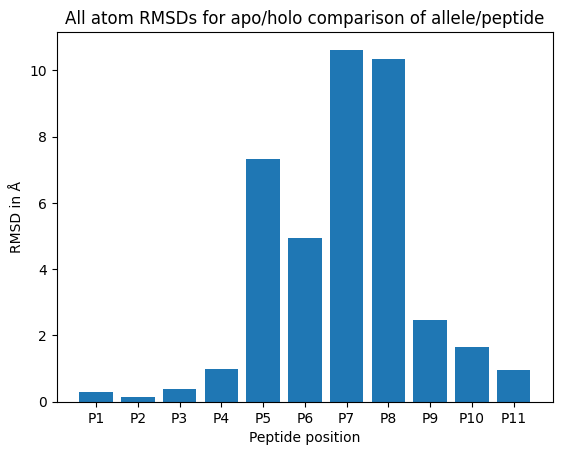

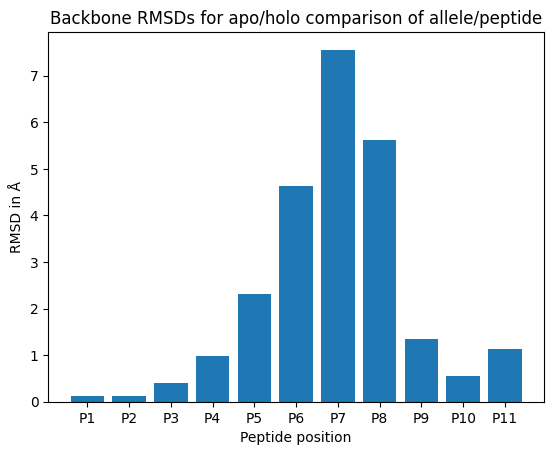

APO form {apo_pdb_code}


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

HOLO form {holo_pdb_code}


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
from google.colab import output
import py3Dmol
import matplotlib.pyplot as plt

output.enable_custom_widget_manager()

comparison = '4pra_vs_4prp' #@param {type:"string"}

structure_complex = find_complex_for_comparison(comparison)

if structure_complex:

  url_base = "https://raw.githubusercontent.com/drchristhorpe/apo_vs_holo_pmhc_tcr/main/structures"


  apo_pdb_code = comparison.split('_')[0]
  holo_pdb_code = comparison.split('_')[2]

  apo_peptide_url = f"{url_base}/apo_pmhc/clean/{apo_pdb_code}_1_peptide.pdb"
  holo_peptide_url = f"{url_base}/holo_pmhc_tcr/clean/{holo_pdb_code}_1_peptide.pdb"

  r1 = requests.get(apo_peptide_url)
  r2 = requests.get(holo_peptide_url)

  view = py3Dmol.view(width=800, height=500)
  view.addModelsAsFrames(r1.text)
  view.addModelsAsFrames(r2.text)
  view.setStyle({'model': 0}, {"stick": {'colorscheme': 'yellowCarbon'}})
  view.setStyle({'model': 1}, {"stick": {'colorscheme': 'greenCarbon'}})
  view.zoomTo()
  view.show()

  print (f"Yellow = apo structure {apo_pdb_code}")
  print (f"Green = holo structure {holo_pdb_code}")

  print (f"Allele/peptide: {structure_complex}")
  print ('')
  print ('')

  def rmsd_plot(data, rmsd_type, allele, peptide):
    labels = [f"P{position}" for position in list(data.keys())]
    values = list(data.values())

    plt.bar(range(len(data)), values, tick_label=labels)
    plt.title(f"{rmsd_type} RMSDs for apo/holo comparison of {allele}/{peptide}")
    plt.xlabel('Peptide position')
    plt.ylabel('RMSD in Å')
    plt.show()


  comparison_all_atom = rmsds[structure_complex][comparison]['all_atom']
  rmsd_plot(comparison_all_atom, 'All atom', 'allele', 'peptide')

  comparison_backbone = rmsds[structure_complex][comparison]['backbone']
  rmsd_plot(comparison_backbone, 'Backbone', 'allele', 'peptide')


  print ('APO form {apo_pdb_code}')

  view = py3Dmol.view(width=800, height=500)
  view.addModelsAsFrames(r1.text)
  view.setStyle({'stick': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':10}}})
  view.zoomTo()
  view.show()

  print ('HOLO form {holo_pdb_code}')

  view = py3Dmol.view(width=800, height=500)
  view.addModelsAsFrames(r2.text)
  view.setStyle({'stick': {'colorscheme': {'prop':'b','gradient': 'roygb','min':50,'max':10}}})
  view.zoomTo()
  view.show()
